In [1]:
import pandas as pd

In [2]:
egdi = pd.read_csv('EGOV_DATA_2022.csv')

In [3]:
egov = egdi.melt(
    id_vars='Country Name',
    value_vars='E-Government Index',
    var_name='EGOV',
    value_name='Porcentagem',
)

In [4]:
egov['Country Name'] = egov['Country Name'].sort_values(ascending=True).reset_index(drop=True)

In [5]:
gov_expenditure = pd.read_excel('imf_government_expenditure.xls')

In [6]:
gov_expenditure['Country'] = gov_expenditure['Country'].sort_values(ascending=True)

In [7]:
paises = gov_expenditure['Country'].unique().tolist()

In [8]:
egov = egov[egov['Country Name'].isin(paises)].reset_index(drop=True)

In [9]:
paises = egov['Country Name'].unique().tolist()

In [10]:
gov_expenditure = gov_expenditure[gov_expenditure['Country'].isin(paises)].reset_index(drop=True)

In [11]:
dispersao = pd.DataFrame()

In [12]:
dispersao["Gastos do governo, porcentagem do PIB"] = gov_expenditure['Percentage']

In [13]:
dispersao['E-Government Development Index'] = egov['Porcentagem']

In [14]:
dispersao['Gastos do governo, porcentagem do PIB'] = dispersao['Gastos do governo, porcentagem do PIB'].apply(lambda x: x/100.0)

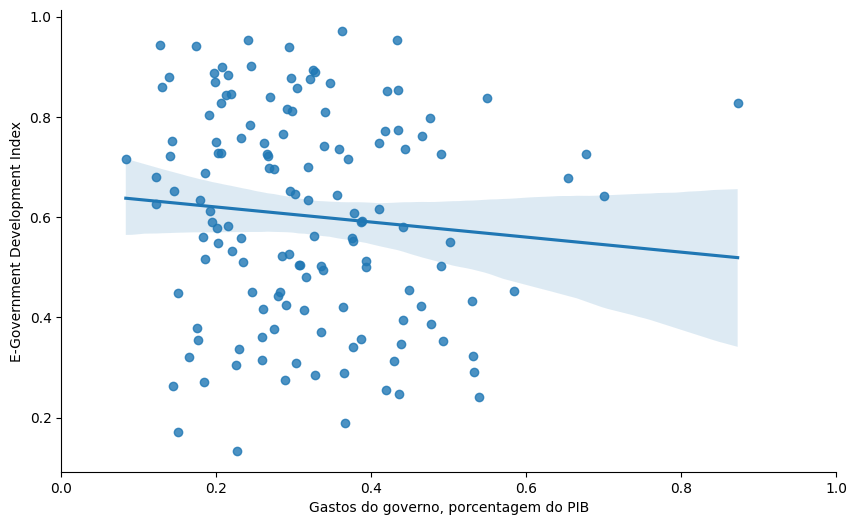

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.regplot(dispersao, x="Gastos do governo, porcentagem do PIB", y='E-Government Development Index')

sns.despine()
plt.xlim(0, 1)
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/dispersao_egov_govexpenditure.png', dpi=300, bbox_inches='tight')
plt.show()